In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

In [17]:
train_dog_dir = "./train/dogs"
train_cat_dir = "./train/cats"
test_dog_dir = "./validation/dogs"
test_cat_dir = "./validation/cats"
# def read_img(size , dog_or_not=False):
#     if dog_or_not== True:
#         directory = train_dog_dir
#     else:
#         directory = train_cat_dir
        
#     img = image.load_img(directory, target_size=size)
#     plt.figure()
#     plt.imshow(img) 
#     plt.show()  # display it
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images



In [18]:
test_dog = load_images_from_folder(test_dog_dir)
test_cat = load_images_from_folder(test_cat_dir)
train_dog = load_images_from_folder(train_dog_dir)
train_cat = load_images_from_folder(train_cat_dir)

In [19]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "./train"
test_dir = "./validation"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
test_dir,  target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


An epoch usually means one iteration over all of the training data. For instance if you have 20,000 images and a batch size of 100 then the epoch should contain 20,000 / 100 = 200 steps. 

In [22]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
model.save('cats_and_dogs_small_1.h5')


Epoch 1/30
100/100 [==============================] - 74s 738ms/step - loss: 0.6927 - acc: 0.5285 - val_loss: 0.6771 - val_acc: 0.5640
Epoch 2/30
100/100 [==============================] - 72s 718ms/step - loss: 0.6626 - acc: 0.6000 - val_loss: 0.6482 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 73s 733ms/step - loss: 0.6196 - acc: 0.6700 - val_loss: 0.6111 - val_acc: 0.6720
Epoch 4/30
100/100 [==============================] - 73s 735ms/step - loss: 0.5691 - acc: 0.7035 - val_loss: 0.6165 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 72s 722ms/step - loss: 0.5417 - acc: 0.7290 - val_loss: 0.5775 - val_acc: 0.6990
Epoch 6/30
100/100 [==============================] - 76s 757ms/step - loss: 0.5113 - acc: 0.7435 - val_loss: 0.5851 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 74s 735ms/step - loss: 0.4826 - acc: 0.7630 - val_loss: 0.5661 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 7

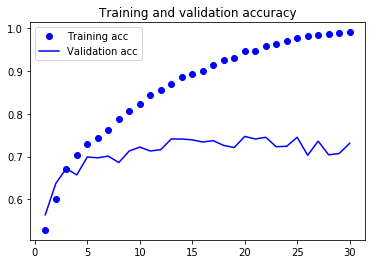

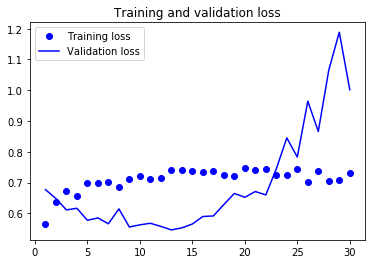

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc,'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

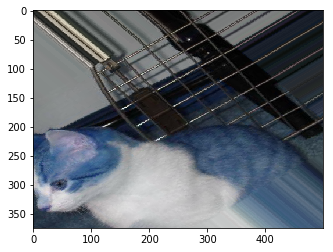

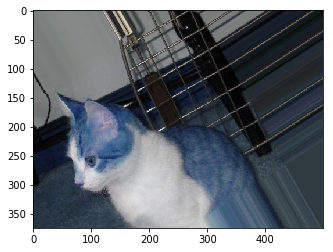

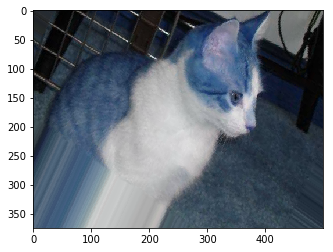

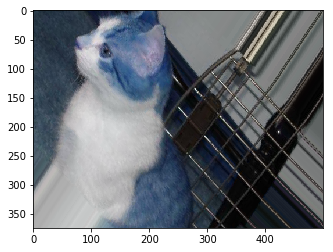

In [26]:
datagen = ImageDataGenerator( rotation_range=40,width_shift_range =0.2,
                            height_shift_range= 0.2,shear_range=0.2,
                             zoom_range= 0.2,horizontal_flip = True,
                             fill_mode ='nearest')
x = train_cat[0]

x = x.reshape((1,)+ x.shape)
i = 0
for batch in datagen.flow(x,batch_size =1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

    

Note that the level of generality (and therefore reusability) of the representations extracted by specific convolution layers depends on the depth of the layer in the model. Layers that come earlier in the model extract local, highly generic feature maps (such as visual edges, colors, and textures), whereas layers that are higher up extract more-abstract concepts (such as “cat ear” or “dog eye”). So if your new dataset differs a lot from the dataset on which the original model was trained, you may be bet- ter off using only the first few layers of the model to do feature extraction, rather than using the entire convolutional base.

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

test_datagen= ImageDataGenerator(rescale= 1./255)
train_datagen = ImageDataGenerator(
rescale= 1./255,
     rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)



Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier similar to those you saw in part 1 of this book. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
def extract_features)directory,sample


In [ ]:
con_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
